In [82]:
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
import seaborn as sns

import json

import matplotlib
import itertools
import matplotlib.pyplot as plt
import matplotlib.colors as colors
%matplotlib inline
from matplotlib import cm
from subprocess import check_output

matplotlib.rcParams['figure.figsize'] = (10,10)
sns.set(rc={'figure.figsize':(18.7,8.27)})

In [89]:
df = pd.read_csv('Dataset\HR_Data.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [84]:
count_sales = df['sales'].value_counts()
count_sales

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: sales, dtype: int64

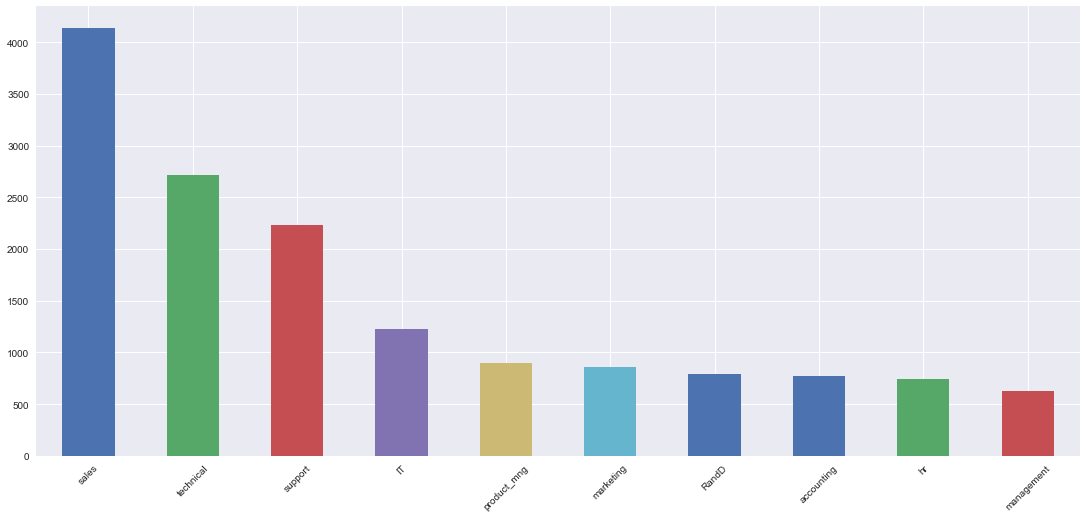

In [85]:
ax = count_sales.plot.bar()
ax.set_xticklabels(labels=count_sales.index, rotation=45, fontsize=10)

plt.show()

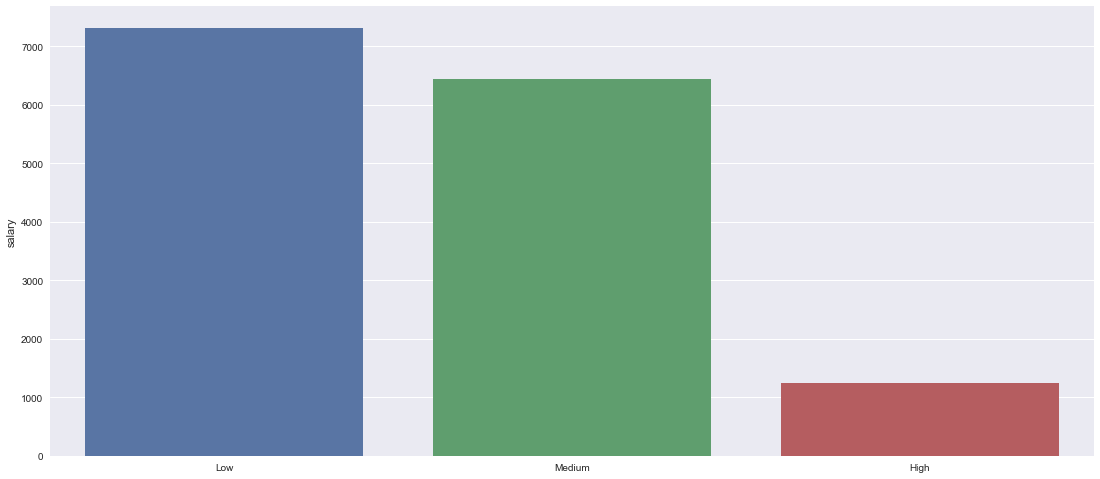

In [67]:
salary_count = df['salary'].value_counts()
types = ('Low', 'Medium', 'High')
sns.barplot(types, salary_count)

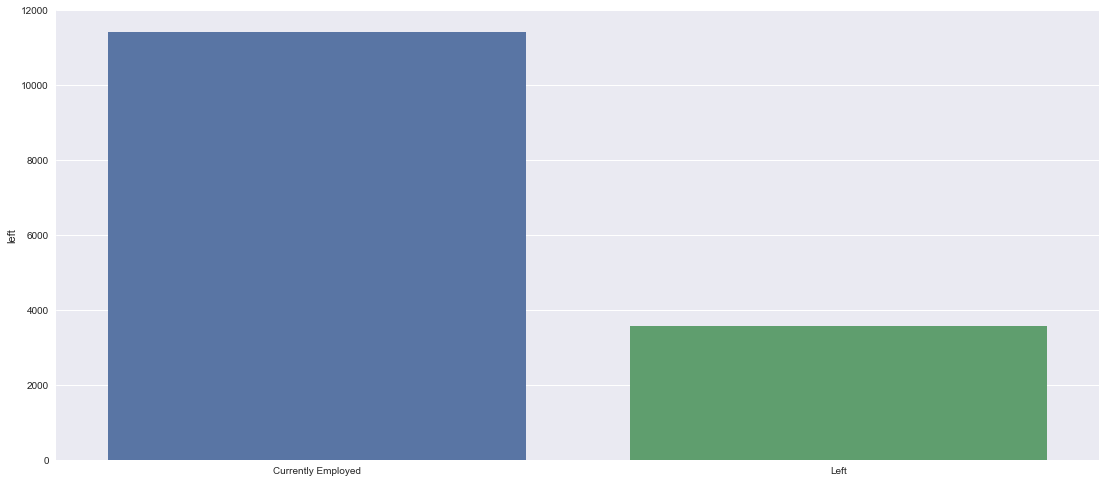

In [68]:
count_left = df['left'].value_counts()
val = ('Currently Employed', 'Left')
sns.barplot(val, count_left)

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [69]:
sales_left_count = 0
technical_left_count = 0
support_left_count = 0
IT_left_count = 0
product_mng_left_count = 0
marketing_left_count = 0
RandD_left_count = 0
accounting_left_count = 0
hr_left_count = 0
management_left_count = 0
for i in range (0,len(df)):
    if df.iloc[i]['left'] == 1 and df.iloc[i]['sales'] == 'sales':
        sales_left_count += 1
    if df.iloc[i]['left'] == 1 and df.iloc[i]['sales'] == 'technical':
        technical_left_count += 1
    if df.iloc[i]['left'] == 1 and df.iloc[i]['sales'] == 'support':
        support_left_count += 1
    if df.iloc[i]['left'] == 1 and df.iloc[i]['sales'] == 'IT':
        IT_left_count += 1
    if df.iloc[i]['left'] == 1 and df.iloc[i]['sales'] == 'product_mng':
        product_mng_left_count += 1
    if df.iloc[i]['left'] == 1 and df.iloc[i]['sales'] == 'marketing':
        marketing_left_count += 1
    if df.iloc[i]['left'] == 1 and df.iloc[i]['sales'] == 'RandD':
        RandD_left_count += 1
    if df.iloc[i]['left'] == 1 and df.iloc[i]['sales'] == 'accounting':
        accounting_left_count += 1
    if df.iloc[i]['left'] == 1 and df.iloc[i]['sales'] == 'hr':
        hr_left_count += 1
    if df.iloc[i]['left'] == 1 and df.iloc[i]['sales'] == 'management':
        management_left_count += 1

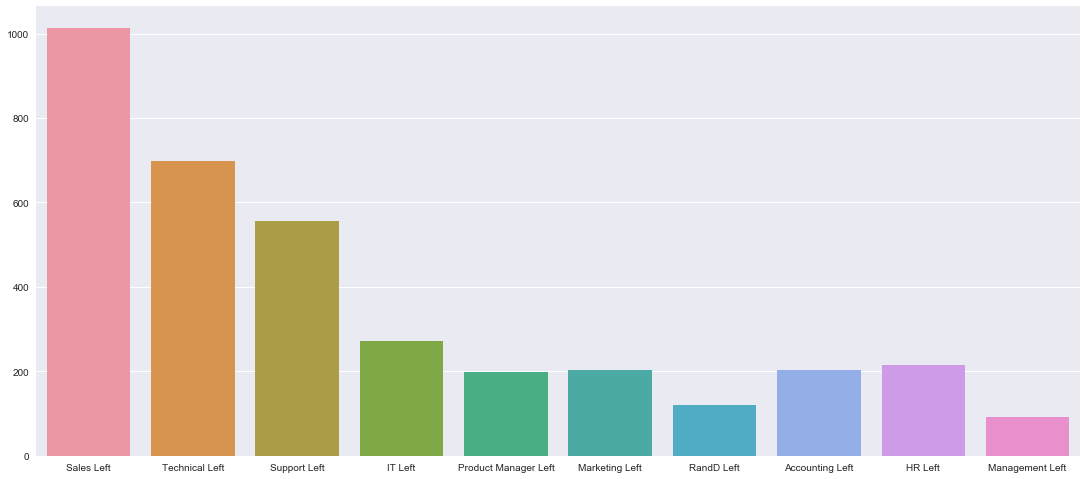

In [70]:
x = ('Sales Left', 'Technical Left', 'Support Left', 'IT Left', 'Product Manager Left', 'Marketing Left','RandD Left' ,'Accounting Left', 'HR Left', 'Management Left')
y = [sales_left_count, technical_left_count, support_left_count, IT_left_count, product_mng_left_count, marketing_left_count, RandD_left_count, accounting_left_count, hr_left_count, management_left_count]
sns.barplot(x,y)

In [71]:
count_low = 0
count_medium = 0
count_high = 0
x = input('Enter Category')
for i in range (0,len(df)):
     if df.iloc[i]['sales'] == x and df.iloc[i]['salary'] == 'low':
            count_low += 1
    
     if df.iloc[i]['sales'] == x and df.iloc[i]['salary'] == 'medium':
            count_medium += 1
    
     if df.iloc[i]['sales'] == x and df.iloc[i]['salary'] == 'high':
            count_high += 1

Enter Categorysales


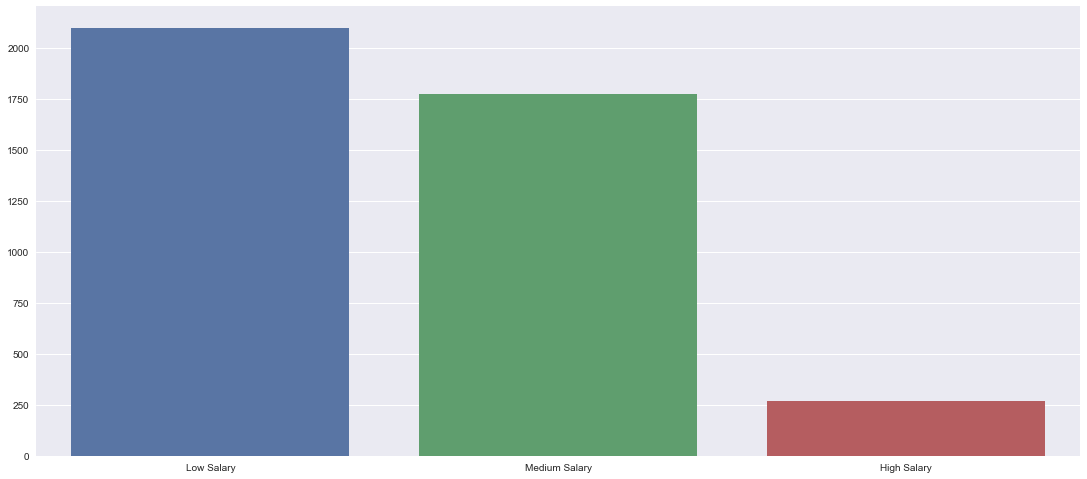

In [72]:
x = ('Low Salary', 'Medium Salary', 'High Salary')
y = [count_low,count_medium,count_high]
sns.barplot(x,y)

In [73]:
less_satisfaction = 0
more_satisfaction = 0
for i in range(0, len(df)):
    if df.iloc[i]['satisfaction_level'] <= 0.5:
        less_satisfaction += 1
    else:
        more_satisfaction += 1

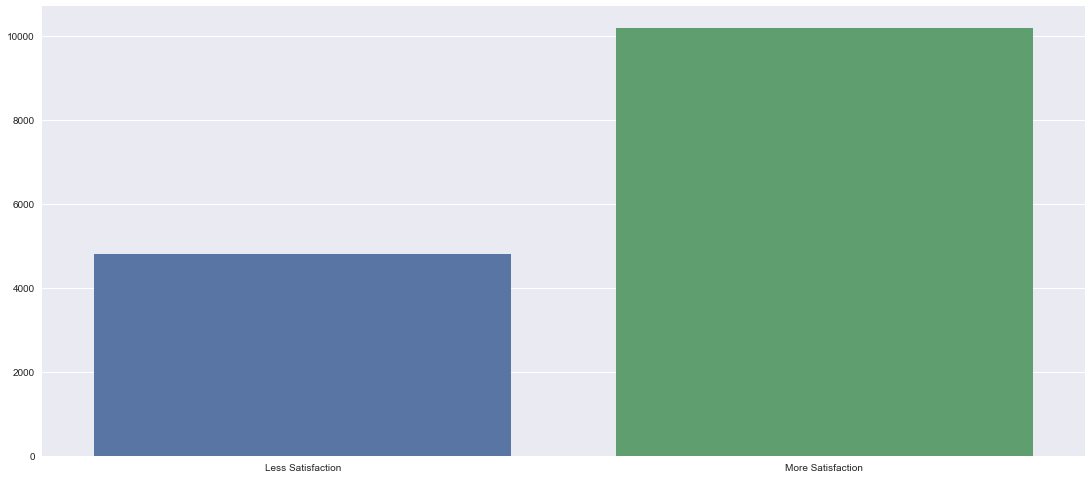

In [74]:
x = ('Less Satisfaction', 'More Satisfaction')
y = [less_satisfaction, more_satisfaction]
sns.barplot(x,y)

In [75]:
less_satisfaction_left = 0
more_satisfaction_left = 0
for i in range(0, len(df)):
    if df.iloc[i]['satisfaction_level'] <= 0.5 and df.iloc[i]['left'] == 1:
        less_satisfaction_left += 1
    elif df.iloc[i]['satisfaction_level'] > 0.5 and df.iloc[i]['left'] == 1:
        more_satisfaction_left += 1

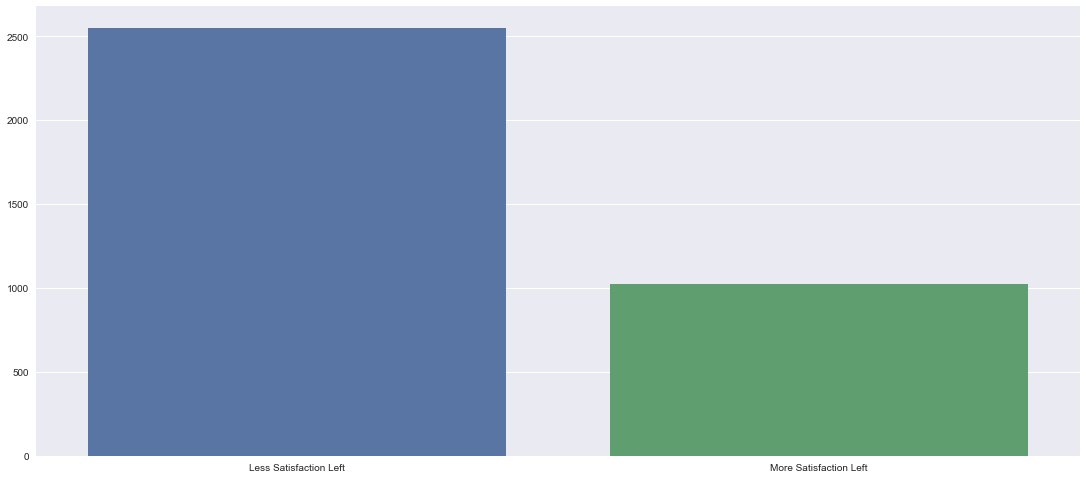

In [76]:
x = ('Less Satisfaction Left', 'More Satisfaction Left')
y = [less_satisfaction_left, more_satisfaction_left]
sns.barplot(x,y)

In [96]:
continues_variable=['satisfaction_level','last_evaluation','average_montly_hours']
categorical_variable=['promotion_last_5years','sales','salary','left','time_spend_company','number_project']
df['Impact']=(df['number_project']/df["average_montly_hours"])*100

In [97]:
df.drop('Impact',axis=1,inplace=True)
corr= df.corr()

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5]),
 <a list of 10 Text xticklabel objects>)

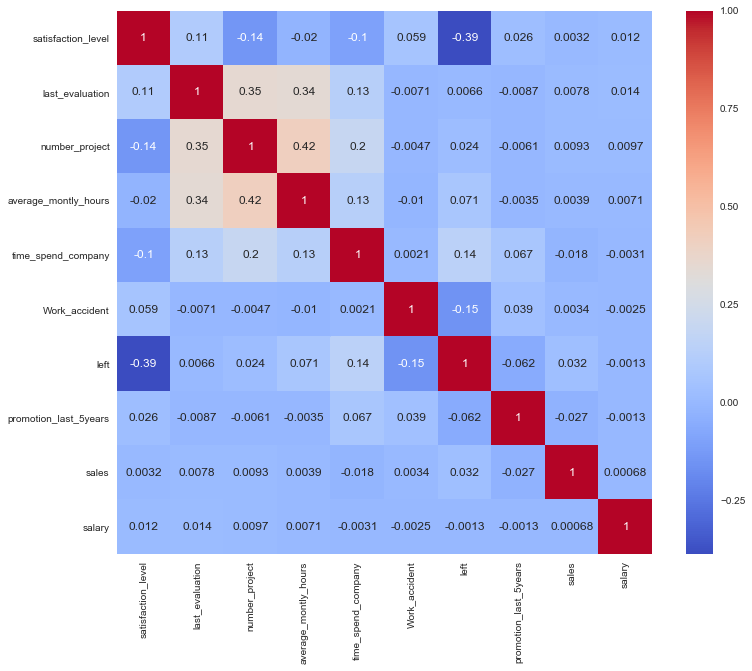

In [98]:
plt.figure(figsize=(12,10))
sns.heatmap(corr,annot=True,cbar=True,cmap="coolwarm")
plt.xticks(rotation=90)

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null int32
salary                   14999 non-null int32
dtypes: float64(2), int32(2), int64(6)
memory usage: 1.0 MB


Text(0.5,0.98,'Satisfaction level Vs Turnover')

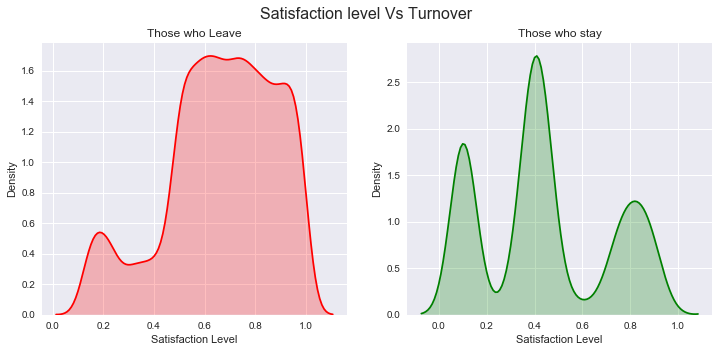

In [100]:
fig,ax=plt.subplots(ncols=2,figsize=(12,5))
left=df[df.left==0]
stay=df[df.left==1]
sns.kdeplot(left.satisfaction_level,shade=True,color="r",ax=ax[0],legend=False)
ax[0].set_xlabel("Satisfaction Level")
ax[0].set_ylabel("Density")
ax[0].set_title("Those who Leave")
sns.kdeplot(stay.satisfaction_level,shade=True,color="g",ax=ax[1],legend=False)
ax[1].set_xlabel("Satisfaction Level")
ax[1].set_ylabel('Density')
ax[1].set_title('Those who stay')
plt.suptitle("Satisfaction level Vs Turnover",fontsize=16)

In [101]:
columns= df.columns.tolist() 
columnscolumns= df.columns.tolist() 
columns

['satisfaction_level',
 'last_evaluation',
 'number_project',
 'average_montly_hours',
 'time_spend_company',
 'Work_accident',
 'left',
 'promotion_last_5years',
 'sales',
 'salary']

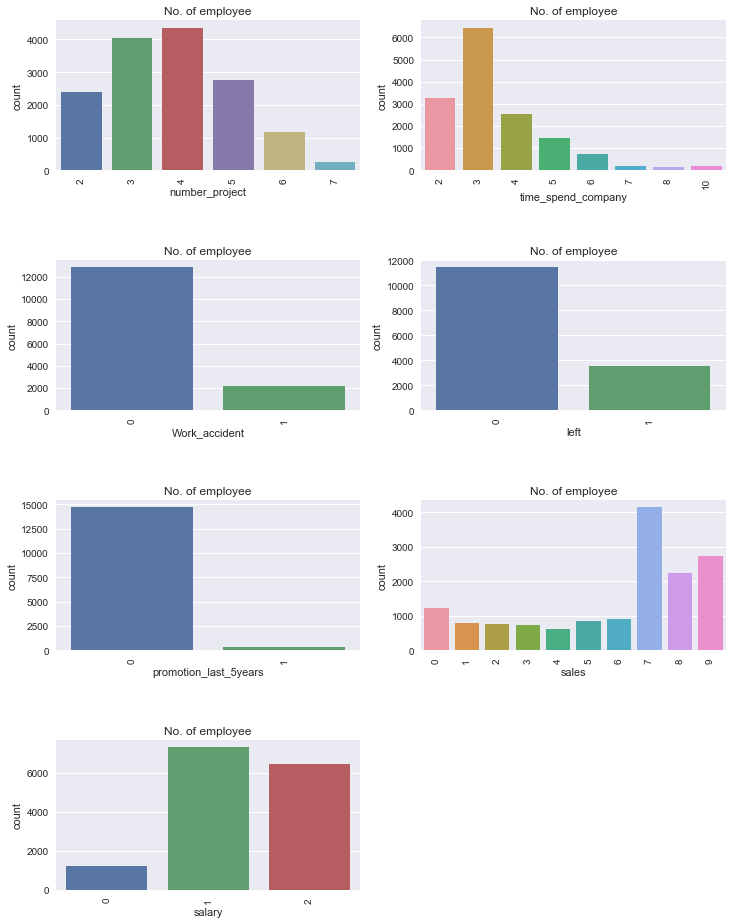

In [102]:
categorical_data=['number_project','time_spend_company','Work_accident','left','promotion_last_5years','sales','salary']
fig=plt.subplots(figsize=(12,16))
tot_length=len(categorical_data)
for i,j in itertools.zip_longest(categorical_data,range(tot_length)): 
    plt.subplot(np.ceil(tot_length/2),2,j+1)
    plt.subplots_adjust(hspace=.6)
    sns.countplot(x=i,data = df)
    plt.xticks(rotation=90)
    plt.title("No. of employee")

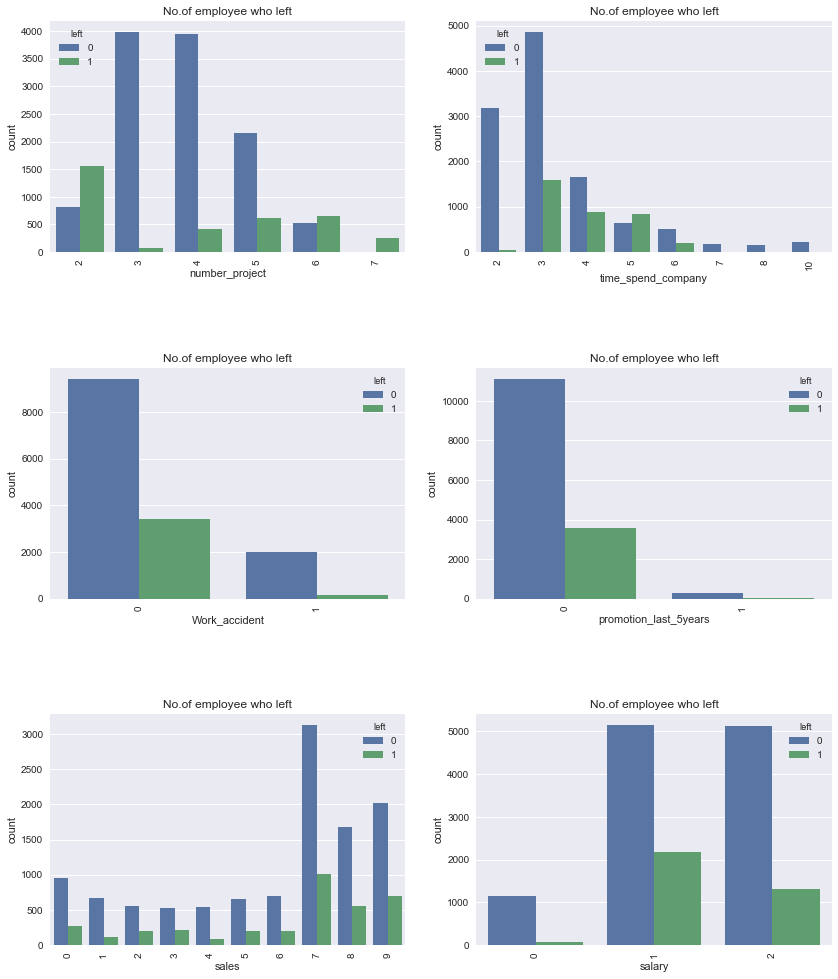

In [103]:
categorical_data_left_removed=['number_project','time_spend_company','Work_accident','promotion_last_5years','sales','salary'] 
fig=plt.subplots(figsize=(14,17))
tot_length=len(categorical_data_left_removed)
for i,j in itertools.zip_longest(categorical_data_left_removed,range(tot_length)): 
    plt.subplot(np.ceil(tot_length/2),2,j+1) 
    plt.subplots_adjust(hspace=.5) 
    sns.countplot(x=i,data = df,hue="left") 
    plt.xticks(rotation=90) 
    plt.title("No.of employee who left") 

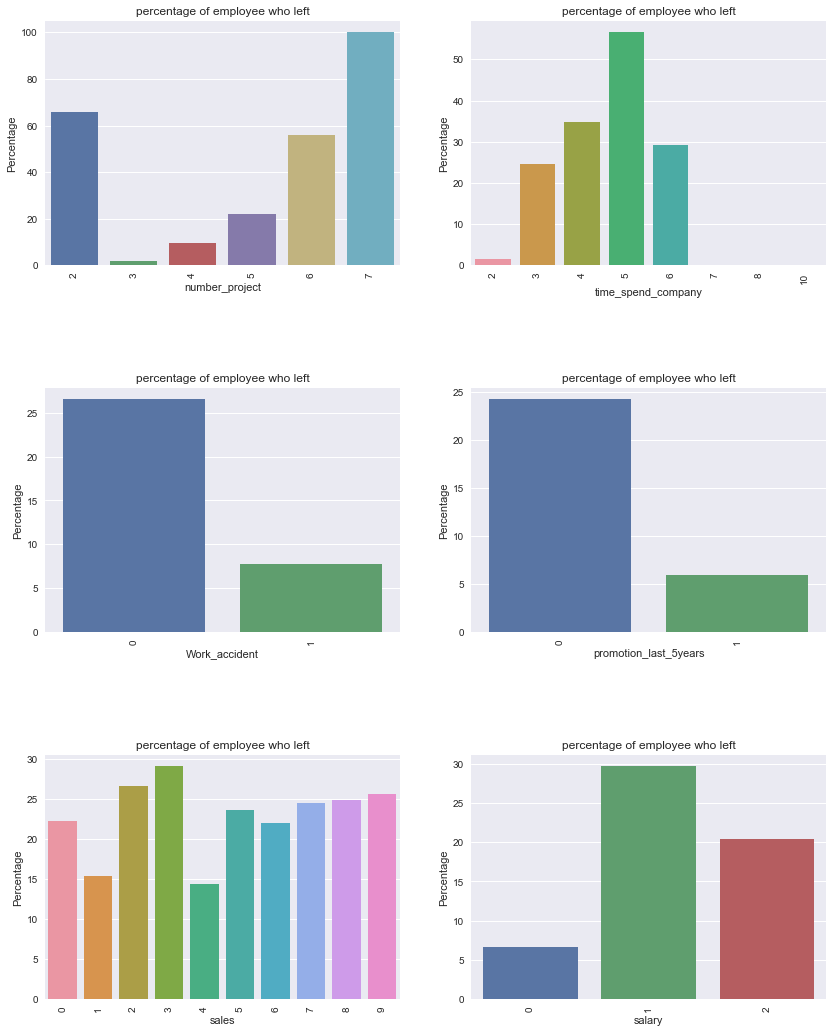

In [104]:
fig=plt.subplots(figsize=(14,18))
for i,j in itertools.zip_longest(categorical_data_left_removed,range(tot_length)):
    data = df.groupby([i])['left'].agg(lambda x: (x==1).sum()).reset_index()
    data1=df.groupby([i])['left'].count().reset_index()  
    data2 = pd.merge(data,data1,on=i) 
    data2["Proportion"]=(data2['left_x']/data2['left_y'])*100 
    data2=data2.sort_values(by="Proportion",ascending=False).reset_index(drop=True)
    plt.subplot(np.ceil(tot_length/2),2,j+1)
    plt.subplots_adjust(hspace=.5)
    sns.barplot(x=i,y='Proportion',data=data2)
    plt.xticks(rotation=90)
    plt.title("percentage of employee who left")
    plt.ylabel('Percentage')


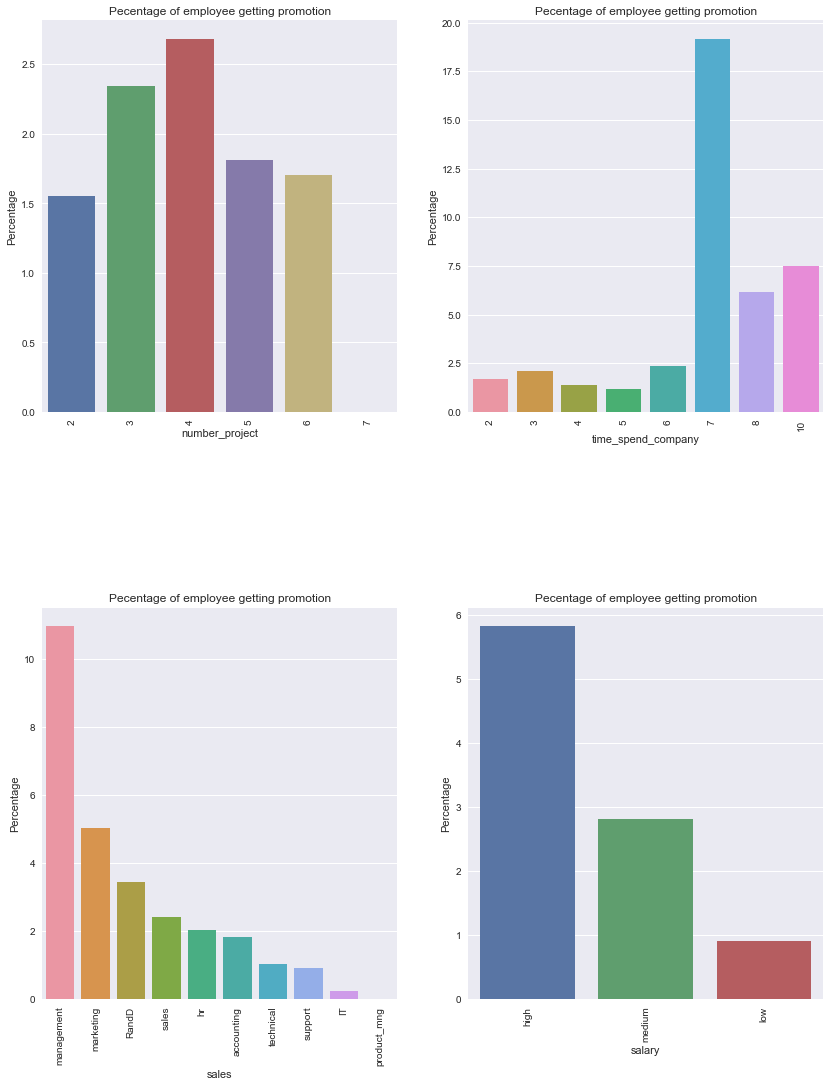

In [126]:
fig=plt.subplots(figsize=(14,18))
categorical_fin=['number_project','time_spend_company','sales','salary']
length_fin=len(categorical_fin)
for i,j in itertools.zip_longest(categorical_fin,range(length_fin)):
    Proportion_of_data = df.groupby([i])['promotion_last_5years'].agg(lambda x: (x==1).sum()).reset_index()
    Proportion_of_data1 = df.groupby([i])['promotion_last_5years'].count().reset_index()
    Proportion_of_data2 = pd.merge(Proportion_of_data,Proportion_of_data1,on=i)
    Proportion_of_data2["Proportion"]=(Proportion_of_data2['promotion_last_5years_x']/Proportion_of_data2['promotion_last_5years_y'])*100 
    Proportion_of_data2=Proportion_of_data2.sort_values(by="Proportion",ascending=False).reset_index(drop=True)
    plt.subplot(np.ceil(length_fin/2),2,j+1)
    plt.subplots_adjust(hspace=.5)
    sns.barplot(x=i,y='Proportion',data=Proportion_of_data2)
    plt.xticks(rotation=90)
    plt.title("Pecentage of employee getting promotion")
    plt.ylabel('Percentage')

In [106]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.cross_validation import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.naive_bayes import GaussianNB as GB
from sklearn.svm import SVC

In [135]:
def Different_Classification_model(model,Data,x,y): 
    train,test = train_test_split(Data,test_size= 0.33)
    train_data_x = Data.ix[train.index,x] 
    train_data_y = Data.ix[train.index,y] 
    test_data_x = Data.ix[test.index,x] 
    test_data_y = Data.ix[test.index,y]
    model.fit(train_data_x,train_data_y.values.ravel())
    pred=model.predict(test_data_x)
    accuracy=accuracy_score(test_data_y,pred)
    return accuracy

In [127]:
All_features=['satisfaction_level',
'number_project',
'time_spend_company',
'average_montly_hours',
'last_evaluation',
'sales',
'salary',
'Work_accident',       
'promotion_last_5years']
print(All_features)
Important_features = ['satisfaction_level',
'number_project',
'time_spend_company',
'average_montly_hours',
'last_evaluation']
print(Important_features)
Pred_var = ["left"]
print(Pred_var)

['satisfaction_level', 'number_project', 'time_spend_company', 'average_montly_hours', 'last_evaluation', 'sales', 'salary', 'Work_accident', 'promotion_last_5years']
['satisfaction_level', 'number_project', 'time_spend_company', 'average_montly_hours', 'last_evaluation']
['left']


In [117]:
y = np.ravel(df.loc[:,['left']])
ind = list(enumerate(np.unique(df['sales'])))
ind_dict = {name:i for i, name in ind}
df.sales = df.sales.map(lambda x: ind_dict[x]).astype(int)
sal = list(enumerate(np.unique(df['salary'])))
sal_dict = {name:i for i, name in sal}
df.salary = df.salary.map(lambda x: sal_dict[x]).astype(int)
df.drop(['left'], axis=1 , inplace=True)


print(df.dtypes)

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
promotion_last_5years      int64
sales                      int32
salary                     int32
dtype: object


In [118]:
from sklearn.preprocessing import StandardScaler
X = df.values
X_scaled = StandardScaler().fit_transform(X)
print(X_scaled.shape)
from sklearn.decomposition import PCA
pca = PCA(n_components=2).fit_transform(X_scaled)
print(pca.shape)

(14999, 9)
(14999, 2)


In [119]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=7, test_size=0.3)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
data_train, data_test, Y_train, Y_test = train_test_split(pca, y, random_state=7, test_size=0.3)
print(data_train.shape, data_test.shape, Y_train.shape, Y_test.shape)

(10499, 9) (4500, 9) (10499,) (4500,)
(10499, 2) (4500, 2) (10499,) (4500,)


In [140]:
df = pd.read_csv('Dataset\HR_Data.csv')
from sklearn.model_selection import cross_val_score 
def Different_Classification_model_CV(model,Data,x,y): 
    data_x = Data.ix[:,x] 
    data_y = Data.ix[:,y] 
    data_y=data_y.values.ravel()
    final_scores = cross_val_score(model,data_x,data_y,scoring="accuracy",cv=10)
    print(final_scores) 
    print('')
    accuracy=final_scores.mean()
    return accuracy

In [143]:
models=["RandomForestClassifier","Gaussian Naive Bays","KNN","Logistic_Regression","Support_Vector"]
Different_Classification_models = [RandomForestClassifier(n_estimators=200),GB(),knn(n_neighbors=15),LogisticRegression(),SVC()]
Model_Accuracy = []
for model,val in zip(Different_Classification_models,models):
    print(val) 
    print('')
    Accuracy=Different_Classification_model_CV(model,df,Important_features,Pred_var)
    
    Model_Accuracy.append(Accuracy)

RandomForestClassifier

[0.99866755 0.998      0.98333333 0.97866667 0.978      0.99466667
 0.998      0.998      0.99933289 1.        ]

Gaussian Naive Bays

[0.81412392 0.79       0.82666667 0.80933333 0.80533333 0.802
 0.808      0.788      0.80186791 0.7838559 ]

KNN

[0.94603598 0.94066667 0.944      0.94466667 0.94266667 0.94
 0.95333333 0.944      0.95130087 0.94663109]

Logistic_Regression

[0.77748168 0.768      0.778      0.77866667 0.788      0.77733333
 0.77666667 0.76       0.71047365 0.6897932 ]

Support_Vector

[0.95936043 0.95133333 0.95533333 0.958      0.95533333 0.956
 0.96133333 0.95666667 0.96797865 0.96864576]



In [144]:
Accuracy_Data = pd.DataFrame(
    { "Classification Model" :models,
     "Accuracy for HR Data":Model_Accuracy
     
    })
Accuracy_Data.sort_values(by="Accuracy for HR Data",ascending=False).reset_index(drop=True)

,Accuracy for HR Data,Classification Model
0,0.992667,RandomForestClassifier
1,0.958998,Support_Vector
2,0.945330,KNN
3,0.802918,Gaussian Naive Bays
4,0.760442,Logistic_Regression
